## **Importing Libraries and Data**

In [9]:
!pip install -r requirements.txt

In [11]:
#Importing
%pip install python-gnupg
%pip install eep153_tools
%matplotlib inline
import pandas as pd
import numpy as np
import eep153_tools
import cfe
from cfe import Regression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [12]:
%run Acquiring_Dataframes.py

<Figure size 640x480 with 0 Axes>

## **Nutritional Adequacy of Diet**

In [75]:
#Get saved result
ugd1_result = cfe.read_pickle('RGSN Files/Uganda05-06.rgsn')
#Define predicted expenditures
xhat = ugd1_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd1_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [76]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          183058.144165
Protein           6618.358487
Fiber             3615.967723
Folate           52316.452706
Calcium          31709.615176
Carbohydrate     33176.376464
Iron              1255.622672
Niacin            1652.344330
Riboflavin         103.212774
Thiamin            150.406124
Vitamin A        34371.958871
Vitamin B-12       260.570466
Vitamin B-6        305.164637
Vitamin C        15325.338531
Zinc               674.799922
Magnesium            0.000000
Phosphorus           0.000000
Potassium            4.021463
Vitamin E            0.000000
Vitamin K            0.000000
dtype: float64

In [77]:
#Obtain recommended daily intake
ugd1_z = ugd1_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd1_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
1013000201,2005-06,Central,10.762197,26.254255,13.329403,17.762919,2.810666,22.328048,16.598010,17.788086,13.654028,15.017151,4.981067,25.948651,29.526178,27.473679,9.167090,0.0,0.0,0.000085,0.0,0.0
1013000209,2005-06,Central,9.667321,15.568346,11.531574,10.389850,2.291373,17.932975,12.956453,11.769412,8.713104,9.966668,3.371008,16.075748,15.323503,12.451113,7.346285,0.0,0.0,0.000073,0.0,0.0
1013000210,2005-06,Central,2.846654,5.101542,3.538099,3.867095,0.673571,5.733352,3.522938,3.563902,2.847712,3.612639,1.229537,4.861741,6.460946,5.426983,2.267725,0.0,0.0,0.000028,0.0,0.0
1013000211,2005-06,Central,7.209081,18.430130,8.723274,11.198677,1.709580,10.997859,8.368796,11.107569,8.412761,9.341560,3.308566,17.060590,19.120454,19.327530,6.402416,0.0,0.0,0.000057,0.0,0.0
1013000212,2005-06,Central,3.673065,7.106238,4.493917,4.796063,0.828588,6.362330,4.440323,4.731198,3.757147,4.501112,1.589098,6.692839,7.973692,7.066153,3.081303,0.0,0.0,0.000033,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193003506,2005-06,Western,1.630477,2.843879,2.684455,3.587892,0.482947,3.891652,2.382808,1.914874,1.549376,2.886277,0.887043,1.904137,4.667581,3.754519,1.435040,0.0,0.0,0.000014,0.0,0.0
4193003507,2005-06,Western,6.042435,13.374513,9.926977,13.061244,1.868859,12.989316,9.134449,9.348607,7.433806,10.203076,3.142766,10.425593,19.387658,17.987501,5.548014,0.0,0.0,0.000041,0.0,0.0
4193003508,2005-06,Western,3.706498,6.886185,6.248309,7.303821,1.097137,8.497942,4.250885,5.038926,4.140531,6.402363,2.144506,4.233539,11.483635,9.331946,3.477859,0.0,0.0,0.000028,0.0,0.0


In [78]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/05-06 Nutrient Data.csv')

<Axes: >

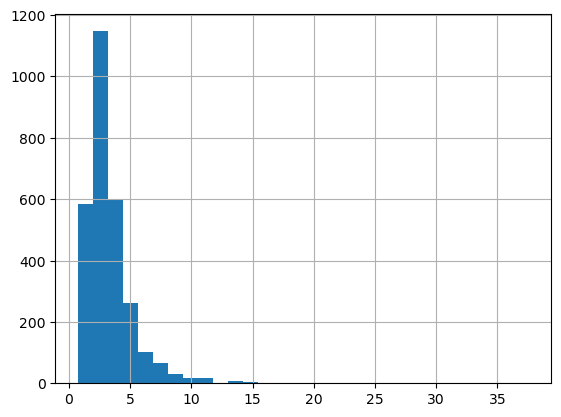

In [79]:
#Plot nutrient ratio for specific nutrient
%matplotlib inline
nutrient_ratio['Energy'].hist(bins=30)

In [40]:
#Get saved result
ugd2_result = cfe.read_pickle('RGSN Files/Uganda09-10.rgsn')
#Define predicted expenditures
xhat = ugd2_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd2_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [41]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          175452.273031
Protein           5832.749911
Fiber             3375.361083
Folate           45654.694490
Calcium          35738.466476
Carbohydrate     31735.102034
Iron              1342.502999
Niacin            1447.908123
Riboflavin          94.886092
Thiamin            146.212698
Vitamin A        29347.147035
Vitamin B-12       191.460155
Vitamin B-6        258.259806
Vitamin C        13619.715958
Zinc               695.335229
Magnesium            0.000000
Phosphorus           0.000000
Potassium            3.873114
Vitamin E            0.000000
Vitamin K            0.000000
dtype: float64

In [42]:
#Obtain recommended daily intake
ugd2_z = ugd2_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd2_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
1013000201,2009-10,Central,2.208043,3.375083,2.912099,2.756541,0.729199,5.159432,2.322924,2.550541,2.344314,2.997168,0.978543,2.418490,4.767642,4.129091,1.974558,0.0,0.0,0.000023,0.0,0.0
1013000204,2009-10,Central,2.988684,5.310894,3.953930,3.987673,0.765309,5.202224,3.706038,3.632296,2.958503,4.231119,1.366393,3.122144,6.676655,7.138425,2.948875,0.0,0.0,0.000027,0.0,0.0
1013000206,2009-10,Central,7.080099,10.067275,9.094885,9.723997,3.607592,18.251187,14.263978,8.555919,7.561846,9.268742,3.248145,10.292876,15.533251,12.561944,5.542003,0.0,0.0,0.000078,0.0,0.0
101300021302,2009-10,Central,3.006114,4.413860,3.803352,3.497899,0.963315,6.493088,3.396960,3.316300,3.095207,3.716561,1.323170,3.526301,5.558340,4.746802,2.602247,0.0,0.0,0.000030,0.0,0.0
1021000102,2009-10,Central,2.839241,4.740659,3.678847,3.540661,0.729711,5.302653,3.600838,3.343366,2.905438,3.587127,1.227511,3.538383,6.096813,6.081804,2.355130,0.0,0.0,0.000023,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193003503,2009-10,Western,2.158059,3.158320,3.306134,3.472491,0.700964,5.469436,2.758150,2.450995,2.118237,3.427653,1.086522,1.849860,5.266036,4.255366,1.932459,0.0,0.0,0.000017,0.0,0.0
4193003504,2009-10,Western,1.554146,2.259989,2.370810,2.613735,0.553819,4.189241,1.728147,1.644193,1.501584,2.652805,0.737816,1.042873,3.739618,3.090381,1.491507,0.0,0.0,0.000016,0.0,0.0
4193003506,2009-10,Western,2.535890,4.097517,4.048422,4.656592,0.732079,5.727032,3.302181,2.941543,2.406977,4.274618,1.244117,2.094293,6.136291,4.578681,2.413918,0.0,0.0,0.000018,0.0,0.0


In [43]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/09-10 Nutrient Data.csv')

<Axes: >

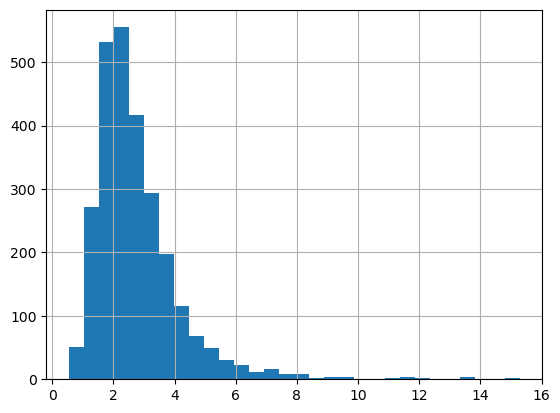

In [44]:
#Plot nutrient ratio for specific nutrient
nutrient_ratio['Energy'].hist(bins=30)

In [45]:
#Get saved result
ugd3_result = cfe.read_pickle('RGSN Files/Uganda10-11.rgsn')
#Define predicted expenditures
xhat = ugd3_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd3_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [46]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          161658.271908
Protein           6912.867683
Fiber             2631.523199
Folate           37016.004551
Calcium          24006.233908
Carbohydrate     26747.242154
Iron              1092.437953
Niacin            1588.530711
Riboflavin          91.754531
Thiamin            125.485128
Vitamin A        11671.844955
Vitamin B-12       349.275746
Vitamin B-6        243.281720
Vitamin C        13421.011060
Zinc               643.521169
Magnesium            0.000000
Phosphorus           0.000000
Potassium            5.563817
Vitamin E            0.000000
Vitamin K            0.000000
dtype: float64

In [47]:
#Obtain recommended daily intake
ugd3_z = ugd3_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd3_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
1013000201,2010-11,Central,1.611042,3.332087,1.876888,2.126363,0.458764,3.796719,1.945230,2.376896,1.833654,2.225136,0.332173,3.659361,3.950311,3.051034,1.499106,0.0,0.0,0.000031,0.0,0.0
1013000204,2010-11,Central,2.496073,6.046425,2.912432,3.343778,0.552428,3.838812,3.055623,3.547676,2.906159,3.570649,0.565376,5.444654,5.887032,6.194533,2.791189,0.0,0.0,0.000040,0.0,0.0
1021000108,2010-11,Central,1.656143,3.512494,1.879820,2.196598,0.451872,3.542298,2.281702,2.433226,1.841014,2.265315,0.315650,4.062178,3.806121,2.797680,1.417791,0.0,0.0,0.000030,0.0,0.0
1021000109,2010-11,Central,2.689075,5.998030,3.049861,3.744009,0.697134,5.635159,3.909539,4.102908,3.150978,3.962244,0.549565,6.342538,7.140376,5.241525,2.565799,0.0,0.0,0.000043,0.0,0.0
1021000111,2010-11,Central,1.583610,3.307998,1.793537,1.812760,0.421290,3.349707,1.504169,2.302497,1.693395,2.023448,0.292315,3.849170,3.546798,2.584637,1.413946,0.0,0.0,0.000027,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193003504,2010-11,Western,1.901751,4.348918,2.528596,2.770985,0.416778,4.075046,1.815800,2.898850,2.149970,2.753757,0.321654,4.381551,4.920594,3.580914,1.799602,0.0,0.0,0.000025,0.0,0.0
4193003506,2010-11,Western,1.990331,4.301048,2.634689,2.917277,0.380336,4.156569,2.292328,2.783463,2.224348,3.057942,0.324838,4.155331,5.083351,3.614634,1.928057,0.0,0.0,0.000017,0.0,0.0
4193003508,2010-11,Western,1.572186,3.879702,2.075855,2.549915,0.364924,3.214670,2.175865,2.515396,1.937004,2.281395,0.314101,4.247045,3.988546,2.830741,1.495739,0.0,0.0,0.000019,0.0,0.0


In [48]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/10-11 Nutrient Data.csv')

<Axes: >

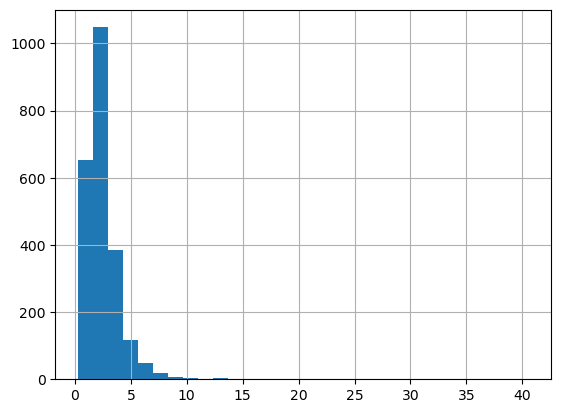

In [49]:
#Plot nutrient ratio for specific nutrient
nutrient_ratio['Energy'].hist(bins=30)

In [50]:
#Get saved result
ugd4_result = cfe.read_pickle('RGSN Files/Uganda11-12.rgsn')
#Define predicted expenditures
xhat = ugd4_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd4_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [51]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          136538.293432
Protein           6102.342183
Fiber             2289.976849
Folate           33803.374170
Calcium          26515.446924
Carbohydrate     21579.494314
Iron               913.537736
Niacin            1330.083454
Riboflavin          79.664490
Thiamin            105.723501
Vitamin A        26160.164490
Vitamin B-12       322.062401
Vitamin B-6        208.020276
Vitamin C         9777.790019
Zinc               523.783559
Magnesium            3.982019
Phosphorus           2.986514
Potassium           55.005525
Vitamin E            0.000000
Vitamin K            0.000000
dtype: float64

In [52]:
#Obtain recommended daily intake
ugd4_z = ugd4_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd4_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
1013000201,2011-12,Central,1.104646,2.356070,1.288442,1.624808,0.344430,2.557567,1.220633,1.458978,1.215935,1.583768,0.608252,2.659591,2.849497,2.138021,0.926355,0.000109,0.000029,0.000112,0.0,0.0
1013000202,2011-12,Central,2.067389,5.217600,2.284377,2.857301,0.600789,3.850378,1.945089,2.979140,2.399790,2.890799,1.210928,5.549339,5.308589,4.420583,1.958285,0.000313,0.000061,0.000247,0.0,0.0
1013000204,2011-12,Central,1.806158,4.619662,1.973109,2.292670,0.442099,2.740655,2.001564,2.507611,1.964022,2.365168,0.965238,4.591232,4.329463,4.038772,1.724618,0.000219,0.000040,0.000158,0.0,0.0
1013000206,2011-12,Central,1.721858,3.110354,1.770556,1.926425,0.576127,3.812287,2.699989,2.155572,1.660023,2.049544,0.715065,4.065508,3.634429,2.390730,1.264944,0.000180,0.000075,0.000227,0.0,0.0
1013000210,2011-12,Central,3.400369,5.710563,3.462936,3.105915,0.871553,5.864530,4.316084,3.739782,3.110898,3.446036,1.666071,6.687466,5.148039,4.083934,2.566989,0.000420,0.000144,0.000440,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4193003210,2011-12,Western,1.296697,2.397797,1.872252,1.941767,0.425109,2.919487,1.245197,1.619475,1.397439,2.024634,0.691112,2.018055,3.222280,2.604984,1.142226,0.000171,0.000043,0.000158,0.0,0.0
4193003502,2011-12,Western,3.004121,6.428603,4.348106,5.540577,1.092623,7.002280,3.862533,4.392560,3.386524,5.053876,1.482222,6.130736,8.649211,6.240545,2.809494,0.000198,0.000060,0.000182,0.0,0.0
4193003504,2011-12,Western,1.297103,2.577356,1.829506,2.173483,0.530474,3.199470,1.488458,1.762942,1.418306,2.126558,0.732768,2.446323,3.557412,2.703362,1.209524,0.000087,0.000027,0.000095,0.0,0.0


In [53]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/11-12 Nutrient Data.csv')

<Axes: >

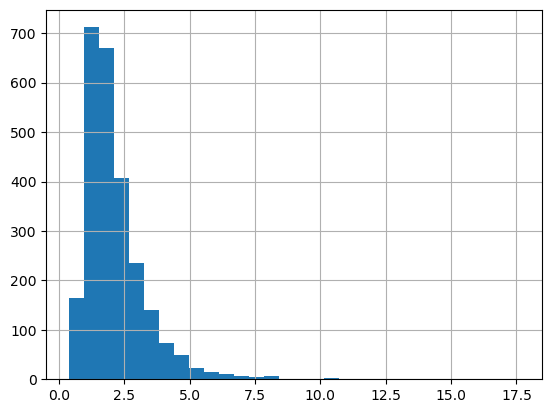

In [54]:
#Plot nutrient ratio for specific nutrient
nutrient_ratio['Energy'].hist(bins=30)

In [55]:
#Get saved result
ugd5_result = cfe.read_pickle('RGSN Files/Uganda13-14.rgsn')
#Define predicted expenditures
xhat = ugd5_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd5_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [56]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          136184.825730
Protein           5166.777200
Fiber             2444.855952
Folate           31070.851222
Calcium          21726.915759
Carbohydrate     22760.265894
Iron               863.753314
Niacin            1266.611355
Riboflavin          82.312661
Thiamin            113.151225
Vitamin A        26576.833700
Vitamin B-12       240.976783
Vitamin B-6        208.071304
Vitamin C        11327.781798
Zinc               506.931801
Magnesium            0.000000
Phosphorus           0.000000
Potassium            5.289386
Vitamin E            0.000000
Vitamin K            0.000000
dtype: float64

In [57]:
#Obtain recommended daily intake
ugd5_z = ugd5_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd5_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
H00101-04-01,2013-14,Central,2.942039,5.141262,3.433442,3.370092,0.874752,6.577704,3.153769,3.974547,3.399160,4.088424,1.499141,5.273122,6.468252,5.139978,2.404289,0.0,0.0,0.000045,0.0,0.0
H00102-04-01,2013-14,Central,1.595748,3.167786,1.910780,2.048993,0.385378,3.186776,1.898470,2.208861,1.844699,2.557829,0.938610,2.823595,4.363871,3.788460,1.414516,0.0,0.0,0.000034,0.0,0.0
H00104-04-01,2013-14,Central,2.310692,4.977397,2.782297,2.756191,0.477726,3.705784,2.335795,3.165044,2.612264,3.404657,1.256694,4.234313,5.393071,5.607235,2.122533,0.0,0.0,0.000036,0.0,0.0
H00208-04-01,2013-14,Central,1.714491,2.814549,2.007978,1.972068,0.480121,3.920864,2.224530,2.222686,1.916380,2.435226,0.742231,3.058474,3.652103,2.599677,1.290124,0.0,0.0,0.000030,0.0,0.0
H00209-04-01,2013-14,Central,1.351691,2.402025,1.582075,1.504321,0.323595,2.752746,1.408182,1.764014,1.473239,1.915684,0.723156,2.269473,3.159689,2.618656,1.116526,0.0,0.0,0.000027,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H43006-04-01,2013-14,Western,2.661168,5.490520,3.764204,4.148064,0.766814,5.884485,3.313697,3.944200,3.224249,4.298694,1.347504,5.700817,7.463004,5.831096,2.324060,0.0,0.0,0.000033,0.0,0.0
H43007-04-01,2013-14,Western,1.597617,3.026751,2.098754,2.311816,0.410511,3.554600,2.416973,2.257092,1.634884,2.624235,0.641039,3.118612,4.484692,3.706115,1.294333,0.0,0.0,0.000032,0.0,0.0
H43008-04-01,2013-14,Western,1.656086,3.600818,2.236467,2.520771,0.355304,2.895480,1.953256,2.345280,1.697516,2.823666,0.788423,2.987527,5.085996,5.643339,1.551130,0.0,0.0,0.000030,0.0,0.0


In [58]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/13-14 Nutrient Data.csv')

<Axes: >

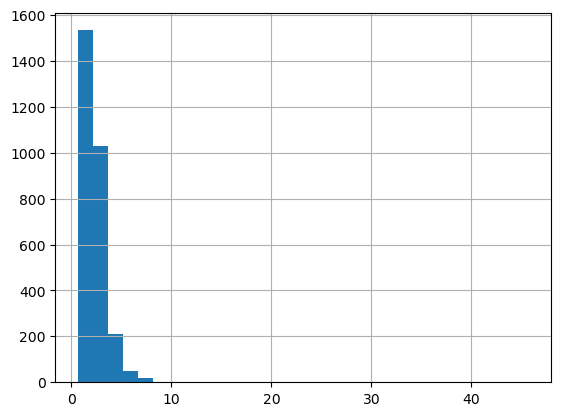

In [59]:
#Plot nutrient ratio for specific nutrient
nutrient_ratio['Energy'].hist(bins=30)

In [60]:
#Get saved result
ugd6_result = cfe.read_pickle('RGSN Files/Uganda15-16.rgsn')
#Define predicted expenditures
xhat = ugd6_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd6_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [61]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          134912.510591
Protein           5025.547146
Fiber             2094.627068
Folate           23919.922046
Calcium          24522.759821
Carbohydrate     22236.733518
Iron               833.341769
Niacin            1307.855763
Riboflavin          80.043776
Thiamin            109.335500
Vitamin A        26699.803576
Vitamin B-12       241.053081
Vitamin B-6        204.924341
Vitamin C        11481.060469
Zinc               540.194732
Magnesium            0.000000
Phosphorus           0.000000
Potassium            5.706786
Vitamin E            0.000000
Vitamin K            0.000000
dtype: float64

In [62]:
#Obtain recommended daily intake
ugd6_z = ugd6_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd6_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
H0010101,2015-16,Central,2.820302,5.223071,2.894928,2.804160,1.150535,6.473210,4.806462,4.294490,3.149916,4.232854,1.152132,5.840257,6.783888,4.423265,2.658277,0.0,0.0,0.000054,0.0,0.0
H0010201,2015-16,Central,1.894441,3.771548,2.010060,1.987834,0.694726,3.824008,2.802434,2.939268,2.106037,3.157327,0.919978,3.380399,4.803211,3.638222,1.984104,0.0,0.0,0.000051,0.0,0.0
H0010401,2015-16,Central,0.973940,2.094081,1.066412,0.901529,0.278531,1.470912,1.011250,1.411851,1.019162,1.459266,0.534081,1.509706,2.286529,2.113987,1.135079,0.0,0.0,0.000023,0.0,0.0
H0020801,2015-16,Central,2.643759,4.657844,2.771232,2.440763,0.954654,5.666282,3.385430,3.799566,2.771867,3.636616,1.091687,5.046534,5.542853,3.967126,2.268445,0.0,0.0,0.000047,0.0,0.0
H0020901,2015-16,Central,2.210524,4.185790,2.255724,2.040220,0.755995,4.585101,2.540402,3.279087,2.374437,3.190704,0.930217,4.193970,4.966009,3.584808,2.086584,0.0,0.0,0.000043,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H4300701,2015-16,Western,2.529929,4.868644,2.756568,2.534270,0.712516,5.423277,3.535197,3.813474,2.711165,3.828312,1.066010,5.547272,6.823622,5.553610,2.144750,0.0,0.0,0.000046,0.0,0.0
H4300801,2015-16,Western,2.094142,4.482573,2.378425,2.164383,0.470480,3.571401,2.181360,3.143270,2.233502,3.303241,1.041566,4.019150,5.938592,6.016346,1.981191,0.0,0.0,0.000038,0.0,0.0
H4300901,2015-16,Western,1.946322,3.124021,2.398836,1.810456,0.507829,4.466682,1.756425,2.647904,2.022540,2.795365,0.989147,2.886214,4.960689,4.393300,1.726681,0.0,0.0,0.000029,0.0,0.0


In [63]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/15-16 Nutrient Data.csv')

<Axes: >

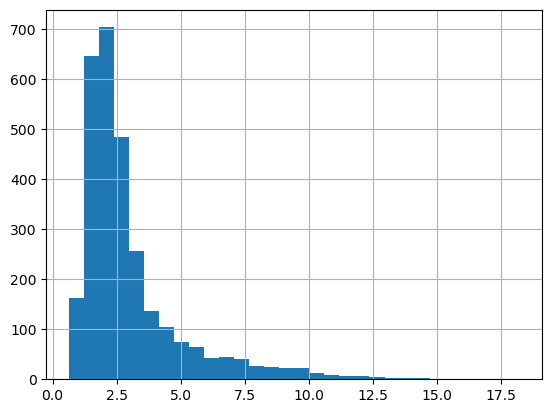

In [64]:
#Plot nutrient ratio for specific nutrient
nutrient_ratio['Energy'].hist(bins=30)

In [65]:
#Get saved result
ugd7_result = cfe.read_pickle('RGSN Files/Uganda18-19.rgsn')
#Define predicted expenditures
xhat = ugd7_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd7_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [66]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          199711.472097
Protein           6472.379052
Fiber             2699.805813
Folate           43559.612082
Calcium          25306.964417
Carbohydrate     26824.947855
Iron              1040.499152
Niacin            1518.348095
Riboflavin          92.048123
Thiamin            134.312831
Vitamin A        25647.238165
Vitamin B-12       282.708210
Vitamin B-6        233.014769
Vitamin C        12648.512877
Zinc               589.923855
Magnesium          258.467155
Phosphorus        3941.440676
Potassium         2045.874372
Vitamin E           83.501040
Vitamin K         1347.630527
dtype: float64

In [67]:
#Obtain recommended daily intake
ugd7_z = ugd7_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd7_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
004e93d7552248ed95d8bc3ec21bdbdb,2018-19,Eastern,3.413957,4.744746,2.860902,3.062679,0.515612,4.616654,2.672176,3.173102,2.423766,3.663494,1.172212,3.744460,5.650261,7.496669,2.041899,0.031394,0.126714,0.011957,0.241889,0.691647
0071da69d26d4b29a8f9d29d458e68cf,2018-19,Northern,5.894238,9.854141,5.478524,6.735729,1.100813,7.209386,4.846281,6.439613,5.015112,6.847938,2.551635,8.258325,10.450213,18.923195,4.042317,0.066111,0.242279,0.022990,0.372180,1.082287
008071c371724fe49a5bb047472df87f,2018-19,Eastern,2.875758,3.781466,2.422311,2.970874,0.571020,5.269029,2.905634,2.780710,2.045027,3.328773,0.966004,3.384611,5.631787,5.901333,1.647546,0.024366,0.116800,0.013118,0.222978,0.625140
00854d05d4f044c985ffce60c1b514c2,2018-19,Western,3.352302,4.475487,3.595991,4.324669,0.695005,6.908504,3.374782,3.545980,2.880871,4.494296,0.874661,3.480007,6.548461,4.382446,2.160853,0.032347,0.195255,0.019682,0.167211,0.306568
00858c2384184dc3bfc800550a6c8cb5,2018-19,Northern,2.846966,4.198594,2.921350,3.966487,0.770542,5.726163,2.594386,3.102754,2.379651,3.813067,1.175763,3.814379,5.866172,6.862276,1.938672,0.022960,0.137405,0.012234,0.157009,0.369661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff6cde2ccba544629beef9be7f4999c1,2018-19,Central,2.411222,3.824118,2.121894,2.537889,0.479856,4.024264,2.326669,2.747995,1.996246,2.719817,0.664612,3.752166,4.086885,3.074117,1.636545,0.017503,0.105318,0.009382,0.155283,0.401933
ff75528be9d54f6d810710b90fa41ea7,2018-19,Northern,2.604927,4.064525,2.599370,3.258552,0.640669,4.542247,2.495932,2.970176,2.273644,3.264497,1.137788,3.952745,5.136970,6.807728,1.739315,0.016616,0.088454,0.008238,0.150684,0.382895
ff86ad516c3b4415a245988155f93052,2018-19,Eastern,2.552548,3.532814,2.812590,3.310447,0.574406,5.431136,2.474478,2.673480,2.067318,3.499973,0.933327,2.549469,5.550264,5.232274,1.780044,0.014069,0.088466,0.007327,0.115658,0.272803


In [68]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/18-19 Nutrient Data.csv')

<Axes: >

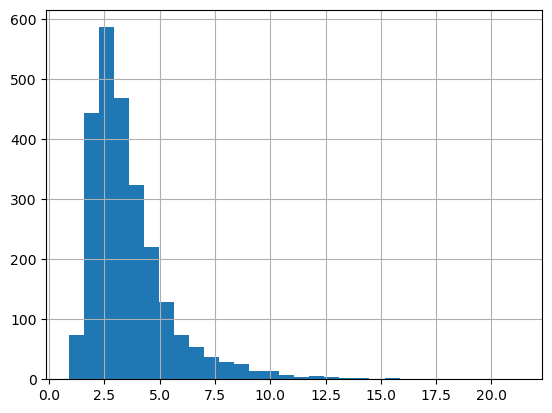

In [69]:
#Plot nutrient ratio for specific nutrient
nutrient_ratio['Energy'].hist(bins=30)

### Uganda 19-20

In [12]:
#Get saved result
ugd8_result = cfe.read_pickle('RGSN Files/Uganda19-20.rgsn')
#Define predicted expenditures
xhat = ugd8_result.predicted_expenditures()
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd8_p.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [13]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          175094.385522
Protein           3471.170520
Fiber             2564.167603
Folate           38557.281698
Calcium          23378.859326
Carbohydrate     23565.723919
Iron               892.313038
Niacin             958.808443
Riboflavin          77.230405
Thiamin            113.501647
Vitamin A        24100.648657
Vitamin B-12        74.543893
Vitamin B-6        190.510107
Vitamin C        11165.587302
Zinc               519.223700
Magnesium          277.867875
Phosphorus        3824.033113
Potassium         2645.579390
Vitamin E           77.415363
Vitamin K         1225.169614
dtype: float64

In [14]:
#Obtain recommended daily intake
ugd8_z = ugd8_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd8_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,2.784719,2.288790,3.149960,3.274534,0.666467,5.684732,2.340870,2.092289,2.290568,3.447899,1.273880,1.138145,5.081356,6.297189,1.789562,0.022115,0.106459,0.015091,0.169874,0.469856
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,2.888203,2.344283,3.105391,3.499421,0.681304,5.134548,2.649667,2.014716,2.378947,3.343219,1.251791,1.341274,4.387771,6.101486,1.764122,0.021820,0.098266,0.014595,0.197549,0.548062
00246782f8654441a9df0f6ec0b6fc9f,2019-20,Northern,1.321786,1.107648,1.323919,1.667790,0.305472,2.166847,1.111159,0.910625,1.029216,1.584880,0.578632,0.496349,2.255576,2.997695,0.843675,0.017967,0.089606,0.009116,0.105449,0.250820
005fbc5779014a0290b088071bde9f72,2019-20,Central,8.794701,7.103284,8.398851,8.183142,1.618183,14.596403,5.215948,6.598164,7.302975,9.375749,2.898919,3.772683,12.971829,11.550934,5.317597,0.079793,0.309033,0.060209,0.500473,1.555854
009c1baa0edb44f8af47773ce0b7caaa,2019-20,Western,4.153315,5.077180,5.060661,6.997727,0.768005,6.545707,4.249626,3.532972,3.866663,5.801052,1.324865,1.825030,8.480675,10.232010,2.987377,0.042631,0.116723,0.019979,0.259426,0.696737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff77648719664071a4e363956db92c08,2019-20,Eastern,5.748807,4.869138,5.193981,5.565470,0.982973,9.207487,3.337413,4.102908,4.437507,6.528608,2.372326,1.957540,10.154668,12.409324,3.411489,0.058492,0.208280,0.035890,0.392075,1.113027
ff8b330984bc466aaf2366c3eea3d8cc,2019-20,Northern,1.747887,1.796394,2.168714,2.793039,0.466158,3.256285,1.765293,1.399987,1.529019,2.609390,1.158748,0.533619,3.813112,4.913856,1.279090,0.018795,0.084450,0.009804,0.101481,0.214972
ffb33b3ededa4019a02be24224ab0440,2019-20,Western,2.333308,2.210416,2.813329,2.886904,0.540596,4.925433,2.148473,1.998521,1.957003,3.014373,0.662025,0.919350,4.510046,4.178632,1.671017,0.013287,0.069189,0.010024,0.096845,0.238948


In [73]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/19-20 Nutrient Data.csv')

<Axes: >

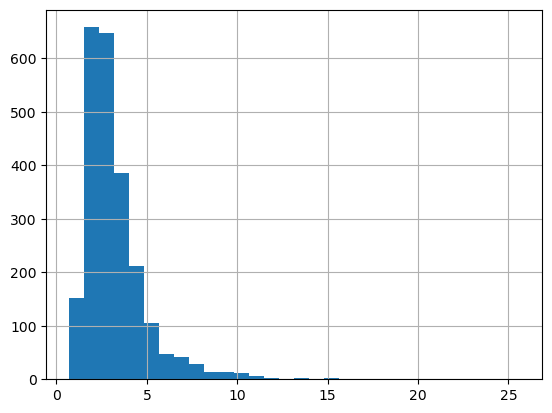

In [15]:
#Plot nutrient ratio for specific nutrient
nutrient_ratio['Energy'].hist(bins=30)

In [ ]:
## Determine Nutritional Deficiencies 

In [1]:
#Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2019-20 Data
#Prices
ugd4_p0 = pd.read_csv('Data Files/Uganda - Food Prices (2005-06).csv')
ugd4_p0 = ugd4_p0[ugd4_p0["u"] == "Kg"]
ugd4_p = pd.pivot_table(ugd4_p0, values="price", index=["j","u"], columns=["t","m"] , aggfunc="median")
#Food Expenditures
ugd4_x0 = pd.read_csv('Data Files/Uganda - Food Expenditures (2005-06).csv')
ugd4_x0['i'] = ugd4_x0['i'].astype(str)
ugd4_x = pd.pivot_table(ugd4_x0, values="Expenditure", index=["i","t","m"], columns="j" , aggfunc="median")
#Consumption
ugd4_x_long = ugd4_x.stack().reset_index(name="Expenditure")
ugd4_p_long = ugd4_p0
ugd4_c = ugd4_x_long.merge(ugd4_p_long, on=["j", "t", "m"], how="left")
ugd4_c["Consumption"] = ugd4_c["Expenditure"] / ugd4_c["price"]
ugd4_c = ugd4_c.pivot_table(values="Consumption", index=["i","t","m","u"], columns="j", aggfunc="sum")
#HH Characteristics
ugd_z0 = pd.read_csv('Data Files/Uganda - Household Characteristics.csv')
ugd4_z = ugd_z0[ugd_z0['t'] == '2005-06']
ugd4_z = ugd4_z.set_index(['i','t','m'])
ugd4_z.columns.name = 'k'
ugd4_z.fillna(0, inplace=True)

#Prices
ugd8_p0 = pd.read_csv('Data Files/Uganda - Food Prices (2019-20).csv')
ugd8_p0 = ugd8_p0[ugd8_p0["u"] == "Kg"]
ugd8_p = pd.pivot_table(ugd8_p0, values="price", index=["j","u"], columns=["t","m"] , aggfunc="median")
#Food Expenditures
ugd8_x0 = pd.read_csv('Data Files/Uganda - Food Expenditures (2019-20).csv')
ugd8_x0['i'] = ugd8_x0['i'].astype(str)
ugd8_x = pd.pivot_table(ugd8_x0, values="Expenditure", index=["i","t","m"], columns="j" , aggfunc="median")
#Consumption
ugd8_x_long = ugd8_x.stack().reset_index(name="Expenditure")  # Ensure values are in a column
ugd8_p_long = ugd8_p0
ugd8_c = ugd8_x_long.merge(ugd8_p_long, on=["j", "t", "m"], how="left")
ugd8_c["Consumption"] = ugd8_c["Expenditure"] / ugd8_c["price"]
ugd8_c = ugd8_c.pivot_table(values="Consumption", index=["i","t","m","u"], columns="j", aggfunc="sum")
#HH Characteristics
ugd8_z = ugd_z0[ugd_z0['t'] == '2019-20']
ugd8_z = ugd8_z.set_index(['i','t','m'])
ugd8_z.columns.name = 'k'
ugd8_z.fillna(0, inplace=True)

In [4]:
#FCT and RDI
#FCT
ugd_fct = pd.read_csv('Data Files/Uganda - FCT.csv')
ugd_fct = ugd_fct.rename(columns={"index":"j"}).set_index(["j"])
ugd_fct.columns.name = 'n'
#RDI
ugd_rdi = pd.read_csv('Data Files/Uganda - RDA.csv')
ugd_rdi = ugd_rdi.set_index(["n"])
ugd_rdi.columns.name = 'k'

In [5]:
#19-20 Avg Expenditure
row_sums8 = ugd8_x.sum(axis=1)
mean_row_sum8 = row_sums8.mean()

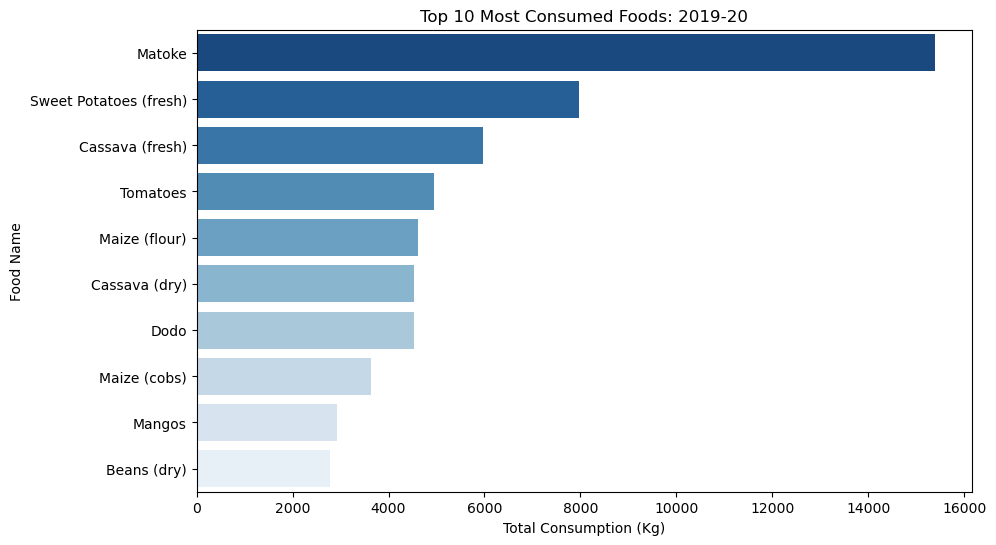

In [7]:
#19-20 Consumption by food, descending
column_sums8 = ugd8_c.sum()
sorted_sums8 = column_sums8.sort_values(ascending=False)
# Select the top 10 most consumed foods
top_10_foods8 = sorted_sums8.nlargest(10)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_foods8.values, y=top_10_foods8.index, hue=top_10_foods8.index, palette="Blues_r", legend=False)
# Labels and title
plt.xlabel("Total Consumption (Kg)")
plt.ylabel("Food Name")
plt.title("Top 10 Most Consumed Foods: 2019-20")
plt.show()

### Nutrient Sufficiency Over Time

In [8]:
# Read in the nutrient ratio data for each year
nutrient_data = {
    '2005-06': pd.read_csv('Nutrient Data/05-06 Nutrient Data.csv'),
    '2009-10': pd.read_csv('Nutrient Data/09-10 Nutrient Data.csv'),
    '2010-11': pd.read_csv('Nutrient Data/10-11 Nutrient Data.csv'),
    '2011-12': pd.read_csv('Nutrient Data/11-12 Nutrient Data.csv'),
    '2013-14': pd.read_csv('Nutrient Data/13-14 Nutrient Data.csv'),
    '2015-16': pd.read_csv('Nutrient Data/15-16 Nutrient Data.csv'),
    '2018-19': pd.read_csv('Nutrient Data/18-19 Nutrient Data.csv'),
    '2019-20': pd.read_csv('Nutrient Data/19-20 Nutrient Data.csv'),
}

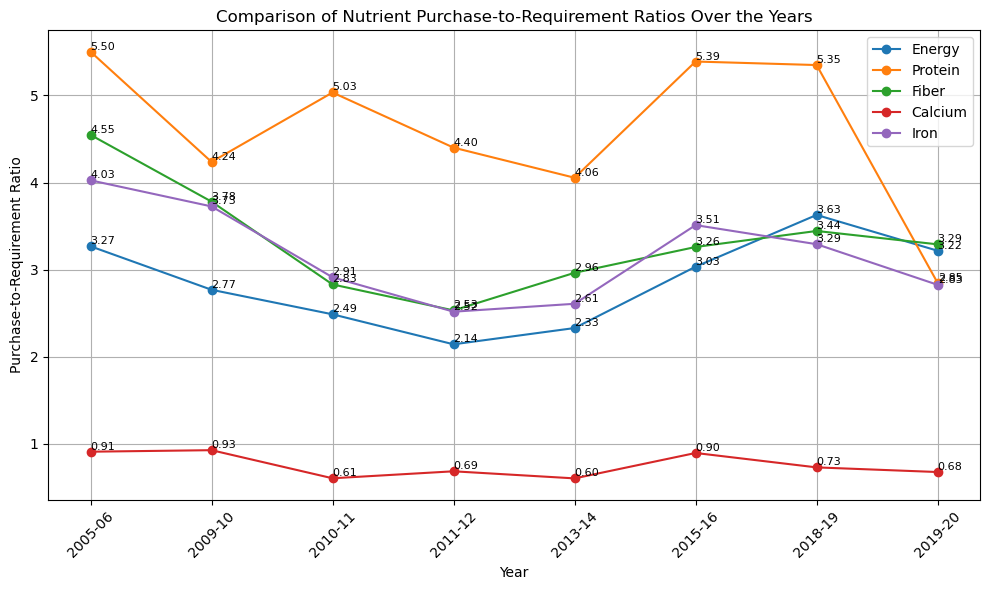

In [9]:
# List of nutrients to analyze
nutrients = ['Energy', 'Protein', 'Fiber', 'Calcium', 'Iron']
# Create a dictionary to hold the nutrient ratios per year for each nutrient
nutrient_ratios = {nutrient: {} for nutrient in nutrients}
# Loop through each nutrient and calculate the ratio for each year
for nutrient in nutrients:
    for year, df in nutrient_data.items():
        nutrient_ratios[nutrient][year] = df[nutrient].mean() 
# Create a plot
plt.figure(figsize=(10, 6))

# Plot each nutrient's ratio over the years
for nutrient in nutrients:
    years = list(nutrient_ratios[nutrient].keys())
    values = list(nutrient_ratios[nutrient].values())
    plt.plot(years, values, marker='o', linestyle='-', label=f'{nutrient}')
    
    # Add text labels to each point
    for x, y in zip(years, values):
        plt.text(x, y, f'{y:.2f}', fontsize=8, ha='left', va='bottom')

# Customize plot
plt.title('Comparison of Nutrient Purchase-to-Requirement Ratios Over the Years')
plt.xlabel('Year')
plt.ylabel('Purchase-to-Requirement Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
# Display
plt.tight_layout()
plt.show()

In the period 2019-2020, the average household only purchased 68% of their nutritional requirement of calcium. 

Bioengineered carrots 

Now, we aim to see what price would be required to increase demand by ~30% for milk in order to meet calcium requirements.

### Demand for Calcium (Milk)

In [13]:
#2019-20
ugd8_result = cfe.Regression(y=np.log(ugd8_x.stack()),d=ugd8_z)


**Budgets:** Get food budget for all households, then find median budget

In [14]:
xhat = ugd8_result.predicted_expenditures()
#Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()
#Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

In [18]:
tmp = ugd8_result.predicted_expenditures()
tmp.index.get_level_values('j').unique()

Index(['Avocado', 'Beans (dry)', 'Beans (fresh)', 'Beef', 'Bogoya', 'Bread',
       'Cabbage (green)', 'Cassava (dry)', 'Cassava (fresh)', 'Chapati',
       'Cooking Oil (refined)', 'Dodo', 'Donuts', 'Eggplant', 'Eggs',
       'Goat Meat', 'Ground Nuts (pounded)', 'Ground Nuts (shelled)',
       'Irish Potatoes', 'Jam/Marmalade', 'Maize (cobs)', 'Maize (flour)',
       'Mangos', 'Matoke', 'Millet Flour', 'Mukene', 'Onions', 'Oranges',
       'Other Vegetables', 'Pawpaw', 'Pumpkins', 'Restaurant (food)',
       'Restaurant (soda)', 'Rice', 'Salt', 'Sweet Potatoes (fresh)',
       'Tea (leaves)', 'Tomatoes', 'Waragi', 'Yams (arrowroot)'],
      dtype='object', name='j')

In [15]:
#Prices per kilogram:
pbar = ugd8_p.mean(axis=1)
pbar = pbar.reset_index(level="u", drop=True) #Reset index so that 'j' becomes a column instead of part of a MultiIndex
pbar = pbar.reindex(ugd8_result.beta.index) #Only use prices for goods we can estimate
#Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar = pbar.replace(np.nan,1)
#Define a function to change a single price in the vector $p$:
def my_prices(p0,j,p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

Text(0.5, 0, 'Quantities of Tomatoes Demanded')

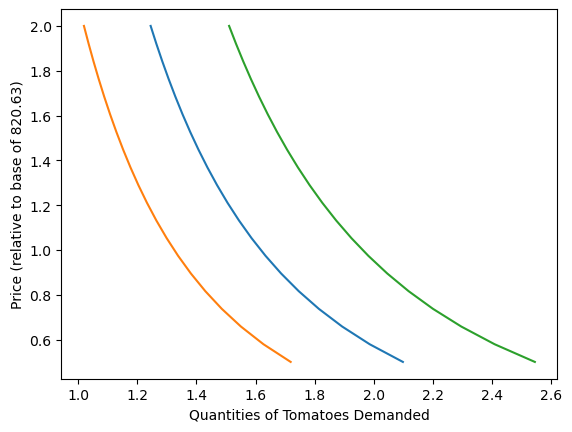

In [16]:
use = 'Tomatoes'  #Good we want demand curve for

#Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

#Demand for Millet for household at median budget
plt.plot([ugd8_result.demands(xref,my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

#Demand for Millet for household at 25% percentile
plt.plot([ugd8_result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

#Demand for Millet for household at 75% percentile
plt.plot([ugd8_result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")